# Part One : Arctic and Antarctic Ice Extent 

Analyzing the Ice Extent from 1979 to 2023 and plotting the  trend of ice extent over time. The Data is from 1978 - 2024,but we have removed 1978 and 2024 as there are only two months in 1978 and  one month in 2024 which makes it unsuitable for analysis.

The below graphs is the goal to plot using the arctic and antarctic sea ice level, the data provided by NSIDC (National Snow and Ice Data Center) which is a part of the University of Colorado Boulder.

We are interested in the columns: "Year", "Month", "Day", "Extent". The column "Extent" has values in million square kilometers.


<img src="img.jpg" alt="Sea Ice Index" width="600" height="400">

# Data Transformation 
<ol>
<li>  Dropping the Source Data column
 <li> Dropping the first row (YYYY, MM, DD, 10^6 sq km	10^6 sq km, 	Source data product web sites: http://nsidc.o...)  as it is not necessary for our analysis.
<li> Converting Year to a numerical data type (int)
<li> Group the DataFrame by the 'year' column.
<li> Calculate the mean of the 'Extent' column for each year.
<li> Reset the DataFrame index, Set the 'year' column as the new index.
<li> Changing the "Year", "Month", "Day" into date and time format
</ol>

### Link

Arctic = https://noaadata.apps.nsidc.org/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv


Antarctic = https://noaadata.apps.nsidc.org/NOAA/G02135/south/daily/data/S_seaice_extent_daily_v3.0.csv


# Team members:
<ul>
<li> Sayed Mossavi 
<li> Dilan Croos
<li> Ranjani A V</ul>

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import watermark
import requests
import pathlib
import zipfile

ModuleNotFoundError: No module named 'pandas'

### Loading the Arctic data

In [ ]:
# if the data is not available, download it
# if Datasets directory is not available, create it
pathlib.Path("Datasets").mkdir(exist_ok=True)

# check the files in the Datasets directory
path = pathlib.Path("Datasets")
files = [file.name for file in path.iterdir()]
if "N_seaice_extent_daily_v3.0.csv" in files:
    print("The data is available")
else:

    # read the data
    url = "https://noaadata.apps.nsidc.org/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv"
    r = requests.get(url)
    with open("Datasets/N_seaice_extent_daily_v3.0.csv", "wb") as f:
        f.write(r.content)


### Reading the data in csv format 

In [ ]:
# Display the data
n_seaice = pd.read_csv('Datasets/N_seaice_extent_daily_v3.0.csv', header=0)
n_seaice.head(10)

### Exploring the data 



In [ ]:
# Columns name 
n_seaice.columns

### Dropping the [' Source Data'], and the first Row of the data

In [ ]:
# Dropping the Source Data colunm
n_seaice_clean =(n_seaice
                 .drop([' Source Data'], axis=1)
                 .drop([0], axis=0)
                 )
n_seaice_clean.head()

In [ ]:
# Explor the data shape
n_seaice_clean.shape

In [ ]:
# Basic information about the data set
n_seaice_clean.info()

### Converting the interested columns into integer format, since all the cols are in object format.

In [ ]:
# Change the Year, Month, Day, Missing and Extent columns to integers
n_seaice_clean['Year'] = n_seaice_clean['Year'].astype(int)
n_seaice_clean['Month'] = n_seaice_clean[' Month'].astype(int)
n_seaice_clean['Day'] = n_seaice_clean[' Day'].astype(int)
n_seaice_clean['Extent'] = n_seaice_clean['     Extent'].astype(float)
n_seaice_clean['Missing'] = n_seaice_clean['    Missing'].astype(float)
n_seaice_clean =(n_seaice_clean
                 .drop([' Month'], axis=1)
                 .drop([' Day'], axis=1)
                 .drop(['     Extent'], axis=1)
                 .drop(['    Missing'], axis=1)
                 )
n_seaice_clean['Date'] = pd.to_datetime(n_seaice_clean[['Year', 'Month', 'Day']])
n_seaice_clean.head()

In [ ]:
# Basic information about the data afer converting the Year colunm to float and dropping unnecessary cols
n_seaice_clean.info()

In [ ]:
# Data Describtion 
n_seaice_clean.describe()

### Grouping  data by Year and get the mean

In [ ]:
# Groupby year the data, and get the mean
n_seaice_grouped = n_seaice_clean.groupby(['Year']).mean()
n_seaice_grouped.head()

### Getting the min and max year 

In [ ]:
# Min & Max year 
yearMin = n_seaice_grouped.index.min()
yearMax = n_seaice_grouped.index.max()
print(yearMin)
print(yearMax)

### Dropping the min and max  (1978 & 2024), and the reason is explained in the beginning of the notebook.

In [ ]:
# remove the first year and the last year
n_seaice_grouped = n_seaice_grouped.drop([yearMin, yearMax])

### Plotting the arctic  sea ice extent

In [ ]:
# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.plot(n_seaice_grouped['Extent'], label='Arctic Ics Extent')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Arctic Sea Ice Extent', fontsize=20)
plt.legend()
plt.show()


### Adding a regression line

In [ ]:
# Add regression line
# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.plot(n_seaice_grouped['Extent'], label='Arctic Ics Extent', color='black')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Arctic Sea Ice Extent', fontsize=20)
plt.legend()

# Add regression line
z = np.polyfit(n_seaice_grouped.index, n_seaice_grouped['Extent'], 1)
p = np.poly1d(z)
plt.plot(n_seaice_grouped.index, p(n_seaice_grouped.index), "r-")
plt.show()


### Loading the Antarctic data

In [ ]:
# if the data is not available, download it

# check the files in the Datasets directory
path = pathlib.Path("Datasets")
files = [file.name for file in path.iterdir()]
if "S_seaice_extent_daily_v3.0.csv" in files:
    print("The data is available")
else:
    # read the data
    url = "https://noaadata.apps.nsidc.org/NOAA/G02135/south/daily/data/S_seaice_extent_daily_v3.0.csv"
    r = requests.get(url)
    with open("Datasets/S_seaice_extent_daily_v3.0.csv", "wb") as f:
        f.write(r.content)



### Reading the data in csv format

In [ ]:
s_seaice = pd.read_csv ('Datasets/S_seaice_extent_daily_v3.0.csv', header=0)

s_seaice.head()

### Exploring the data

In [ ]:
# Name of the columns
s_seaice.columns

### Dropping the column [' Source Data'], and the first Row of the data

In [ ]:
# Dropping the cloumn (Soure Data)
s_seaice_clean = (s_seaice
                  .drop([' Source Data'], axis =1)
                  .drop([0], axis=0))
s_seaice_clean.head()

In [ ]:
# Shape of the data
s_seaice_clean.shape

In [ ]:
# Types of the data 
s_seaice_clean.dtypes

### Converting the interested columns into integer format, since all the cols are in object format.

In [ ]:
# Change the Year, Month and Day columns to integers
s_seaice_clean['Year'] = s_seaice_clean['Year'].astype(int)
s_seaice_clean['Month'] = s_seaice_clean[' Month'].astype(int)
s_seaice_clean['Day'] = s_seaice_clean[' Day'].astype(int)
s_seaice_clean['Extent'] = s_seaice_clean['     Extent'].astype(float)
s_seaice_clean['Missing'] = s_seaice_clean['    Missing'].astype(float)
s_seaice_clean =(s_seaice_clean
                 .drop([' Month'], axis=1)
                 .drop([' Day'], axis=1)
                 .drop(['     Extent'], axis=1)
                 .drop(['    Missing'], axis=1))
s_seaice_clean['Date'] = pd.to_datetime(s_seaice_clean[['Year', 'Month', 'Day']])
s_seaice_clean.head()

### Grouping  data by Year and get the mean

In [ ]:
s_seaice_grouped = s_seaice_clean.groupby(['Year']).mean()
s_seaice_grouped.tail() 

### Getting the min and max year 

In [ ]:
yearMin = s_seaice_grouped.index.min()
yearMax = s_seaice_grouped.index.max()
print(yearMin)
print(yearMax)

### Dropping the min and max  (1978 & 2024), and the reason is explained in the beginning of the notebook.

In [ ]:
# remove 1978 and 2024
s_seaice_grouped = s_seaice_grouped.drop([yearMin, yearMax])

In [ ]:
s_seaice_grouped.tail()

### Plotting the arctic  sea ice extent

In [ ]:
# plot the rolling mean of the sea ice extent

# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
plt.plot(s_seaice_grouped['Extent'], label='Antarctic Ics Extent')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Antarctic Sea Ice Extent', fontsize=20)
plt.legend()
plt.show()

### Adding a regression line

In [ ]:
# Add regression line
# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.plot(s_seaice_grouped['Extent'], label='Antarctic Ics Extent', color='black')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Antarctic Sea Ice Extent', fontsize=20)
plt.legend()

# Add regression line
z = np.polyfit(s_seaice_grouped.index, s_seaice_grouped['Extent'], 1)
p = np.poly1d(z)
plt.plot(s_seaice_grouped.index, p(s_seaice_grouped.index), "r-")
plt.show()


### Plotting together the Arctic & Antarctic sea ice extent 

In [ ]:
# plot the arctic and antarctic ice extent in one plot

# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
plt.plot(s_seaice_grouped['Extent'], label='Antarctic Ics Extent')
plt.plot(n_seaice_grouped['Extent'], label='Arctic Ics Extent')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Sea Ice Extent', fontsize=20)
plt.legend()
plt.show()


### Plotting together the Arctic & Antarctic sea ice extent, and adding the regression line

In [ ]:
# Fit a linear regression line for Antarctic ice extent
x_antarctic = np.arange(len(s_seaice_grouped['Extent']))
y_antarctic = s_seaice_grouped['Extent']
coefficients_antarctic = np.polyfit(x_antarctic, y_antarctic, 1)
poly_line_antarctic = np.poly1d(coefficients_antarctic)

# Fit a linear regression line for Arctic ice extent
x_arctic = np.arange(len(n_seaice_grouped['Extent']))
y_arctic = n_seaice_grouped['Extent']
coefficients_arctic = np.polyfit(x_arctic, y_arctic, 1)
poly_line_arctic = np.poly1d(coefficients_arctic)

# Assuming you have already calculated y_antarctic and y_arctic
# Plotting
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))

# Plot Antarctic sea ice extent and regression line
plt.plot(s_seaice_grouped.index, y_antarctic, label='Antarctic Ice Extent')
plt.plot(s_seaice_grouped.index, poly_line_antarctic(x_antarctic), label='Antarctic Regression Line', color='blue', linestyle='--')

# Plot Arctic sea ice extent and regression line
plt.plot(n_seaice_grouped.index, y_arctic, label='Arctic Ice Extent')
plt.plot(n_seaice_grouped.index, poly_line_arctic(x_arctic), label='Arctic Regression Line', color='orange', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Sea Ice Extent', fontsize=20)
plt.legend()
plt.show()

### Part Two: Global Mean Sea Level

The data for GMSL is from two sources:
1. US Environmental Protection Agency, from 1880-2014. The data is monthly, instead of daily. It is recorded on the 15th of every month. The columns are: "Time", "GMSL".

2. European Environment Agency, from 1993-2022. The data obtained is daily. The columns are: "Year", "GSML".

We intend to observe the change in sea level over the years and evaluate the consistency of the the two data sets.

In [ ]:
# check the files in the Datasets directory
path = pathlib.Path("Datasets")
files = [file.name for file in path.iterdir()]
if "sea-level-rise_zip.zip" in files:
    print("The data is available")

else:
    # read the data
    url = "https://datahub.io/core/sea-level-rise/r/sea-level-rise_zip.zip"
    r = requests.get(url)
    with open("Datasets/sea-level-rise_zip.zip", "wb") as f:
        f.write(r.content)

    # unzip the file
    with zipfile.ZipFile("Datasets/sea-level-rise_zip.zip", 'r') as zip_ref:
        zip_ref.extractall("Datasets/sea-level-rise")



### Reading the data in csv format

In [ ]:
# read the sea level data

sea_level = pd.read_csv('Datasets/sea-level-rise/data/csiro_alt_gmsl_mo_2015_csv.csv', header=0)
sea_level.head()

In [ ]:
sea_level.info()

### Converting the time column (Year)  to a date format

In [ ]:
# convert the time column to datetime

sea_level['Time'] = pd.to_datetime(sea_level['Time'])
sea_level.head()

In [ ]:
sea_level.describe()

### Grouping the data by Time (Year) and getting the mean

In [ ]:
# group by year and get the mean

sea_level_grouped = sea_level.groupby(sea_level['Time'].dt.year).mean()
sea_level_grouped.head()

In [ ]:
sea_level_grouped['GMSL in cm'] = sea_level_grouped['GMSL'].apply(lambda x: x/10)
sea_level_grouped.head()

### Plotting the Global Mean Sea Level  (GMSL)

In [ ]:
# plot the data

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
plt.plot(sea_level_grouped['GMSL'], label='Sea Level Rise (mm)')
plt.xlabel('Year')
plt.ylabel('Sea Level Rise (mm)')
plt.title('Global Mean Sea Level', fontsize=20)
plt.legend()
plt.show()


In [ ]:
# Plot the Arctic and Antarctic ice extent and the global mean sea level in one plot

# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
plt.plot(s_seaice_grouped['Extent'], label='Antarctic Ics Extent')
plt.plot(n_seaice_grouped['Extent'], label='Arctic Ics Extent')
# plt.plot(sea_level_grouped['GMSL in cm'], label='Sea Level Rise (cm)')
plt.xlabel('Year')
plt.ylabel('Extent / Sea Level Rise (mm)')
plt.title('Sea Ice Extent and Sea Level Rise', fontsize=20)
plt.legend()
plt.show()


### EU

In [ ]:
# check the files in the Datasets directory
path = pathlib.Path("Datasets")
files = [file.name for file in path.iterdir()]
if "Data-package.zip" in files:
    print("The data is available")

else:
    # read the data
    url = "https://www.eea.europa.eu/data-and-maps/figures/observed-change-in-global-mean-3/data-package.zip/at_download/file"
    r = requests.get(url)
    with open("Datasets/Data-package.zip", "wb") as f:
        f.write(r.content)

    # unzip the file
    with zipfile.ZipFile("Datasets/Data-package.zip", 'r') as zip_ref:
        zip_ref.extractall("Datasets/sea-level-rise/Data-package")



In [ ]:
# read the sea level data from FIG1a_259008_CLIM012-v4-Data.xlsx file and get the data from the Original Data 3 tab

sea_level_eea = pd.read_excel('Datasets/sea-level-rise/Data-package/FIG1a_259008_CLIM012-v4-Data.xlsx', sheet_name='Original Data 3', header=0)
sea_level_eea.head()

,Year,"Global mean sea level (ensemble, Palmer et al., 2021)","Global mean sea level (satellite altimeter, CMEMS)"
0,1900,-148.467482,NaN
1,1901,-146.753115,NaN
2,1902,-148.321435,NaN
3,1903,-142.164056,NaN
4,1904,-144.403691,NaN


In [ ]:
sea_level_eea.tail(10)

,Year,"Global mean sea level (ensemble, Palmer et al., 2021)","Global mean sea level (satellite altimeter, CMEMS)"
118,2018,NaN,5.690186e+01
119,2019,NaN,6.320915e+01
120,2020,NaN,6.628079e+01
121,2021,NaN,7.093695e+01
122,2022,NaN,7.355689e+01
123,NaN,NaN,NaN
124,Average \n(1993-2010),0.000000,3.947460e-15
125,Linear trend \n(1993-2010),2.997947,2.699543e+00
126,Linear trend \n(whole time series),1.494230,3.322905e+00
127,Change \n(whole time series),NaN,NaN


In [ ]:
# remove last 5 rows

sea_level_eea = sea_level_eea.iloc[:-5]
sea_level_eea.tail(10)

,Year,"Global mean sea level (ensemble, Palmer et al., 2021)","Global mean sea level (satellite altimeter, CMEMS)"
113,2013,NaN,35.798526
114,2014,NaN,38.610678
115,2015,NaN,48.033565
116,2016,NaN,51.807641
117,2017,NaN,53.106594
118,2018,NaN,56.901858
119,2019,NaN,63.209152
120,2020,NaN,66.280787
121,2021,NaN,70.936955
122,2022,NaN,73.556886


In [ ]:
sea_level_eea.columns

Index(['Year', 'Global mean sea level (ensemble, Palmer et al., 2021)',
       'Global mean sea level (satellite altimeter, CMEMS) '],
      dtype='object')

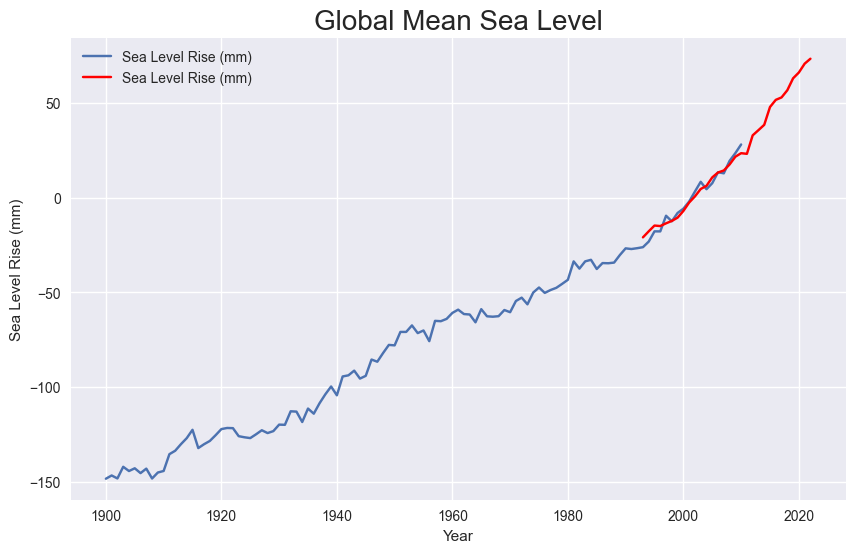

In [ ]:
# plot the data

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
plt.plot(sea_level_eea['Year'], sea_level_eea['Global mean sea level (ensemble, Palmer et al., 2021)'], label='Sea Level Rise (mm)')
plt.plot(sea_level_eea['Year'], sea_level_eea['Global mean sea level (satellite altimeter, CMEMS) '], label='Sea Level Rise (mm)', color='red')
plt.xlabel('Year')
plt.ylabel('Sea Level Rise (mm)')
plt.title('Global Mean Sea Level', fontsize=20)
plt.legend()
plt.show()

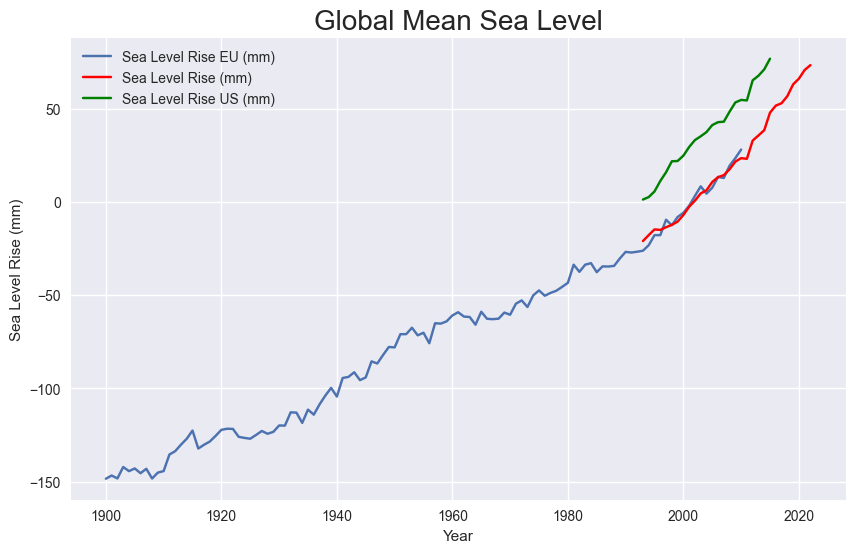

In [ ]:
# plot Us sea level rise and EU sea level rise in one plot

# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
plt.plot(sea_level_eea['Year'], sea_level_eea['Global mean sea level (ensemble, Palmer et al., 2021)'], label='Sea Level Rise EU (mm)')
plt.plot(sea_level_eea['Year'], sea_level_eea['Global mean sea level (satellite altimeter, CMEMS) '], label='Sea Level Rise (mm)', color='red')
plt.plot(sea_level_grouped.index, sea_level_grouped['GMSL'], label='Sea Level Rise US (mm)', color='green')
plt.xlabel('Year')
plt.ylabel('Sea Level Rise (mm)')
plt.title('Global Mean Sea Level', fontsize=20)
plt.legend()
plt.show()